## Credit Card Customer Segmentation
- This case requires developing a customer segmentation to define marketing strategy
- Unsupervised Learning - There is no target variable

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

- Load Dataset

In [11]:
creditcarddata = pd.read_csv(".//Data//CC_GENERAL.csv")
#path for the orignal file

In [13]:
creditcarddata.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Exploratory Data Analysis

In [16]:
# data dimensions
creditcarddata.shape

(8950, 18)

In [18]:
# Data Types
creditcarddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [20]:
#Checking for Missing Values
creditcarddata.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

- There are some missing values in CREDIT_LIMIT and MINIMUM_PAYMENTS

In [23]:
##Checking the missing value count for CREDIT LIMIT
creditcarddata['CREDIT_LIMIT'].isnull().value_counts()

CREDIT_LIMIT
False    8949
True        1
Name: count, dtype: int64

In [25]:
##Checking missing value count for MINIMUM PAYMENTS
creditcarddata['MINIMUM_PAYMENTS'].isnull().value_counts()

MINIMUM_PAYMENTS
False    8637
True      313
Name: count, dtype: int64

- Descriptive Analysis of data

In [28]:
print(creditcarddata["MINIMUM_PAYMENTS"].describe())

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64


In [30]:
## Intital descriptive analysis of the data
creditcarddata.describe(percentiles=[.25,0.50,0.75,0.90]).T

,count,mean,std,min,25%,50%,75%,90%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,4338.563657,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,2542.624000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,1600.099000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,1140.070000,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,3065.534560,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,0.750000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,0.416667,1.50000


### Missing Value Treatment

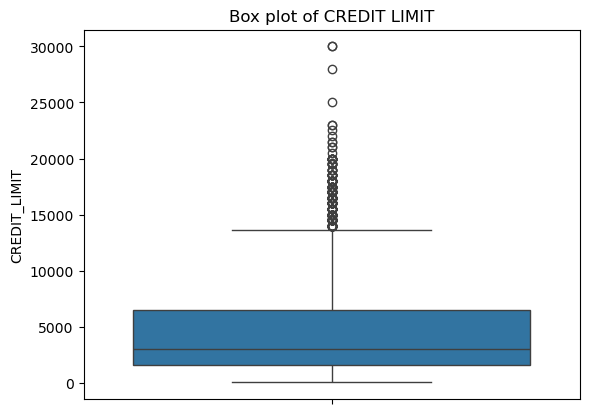

In [33]:
##Checking the distribution of 'CREDIT LIMIT'
sns.boxplot(y = "CREDIT_LIMIT", data=creditcarddata)
plt.title("Box plot of CREDIT LIMIT")
plt.show()

- From the boxplot we have seen the data is skewed, so we will use median to impute the missing data

In [36]:
#Impute with median
creditcarddata['CREDIT_LIMIT'] = creditcarddata['CREDIT_LIMIT'].fillna(creditcarddata['CREDIT_LIMIT'].median())

In [38]:
#Rechecking whether imputing sucessfull or not
creditcarddata['CREDIT_LIMIT'].isnull().sum()

0

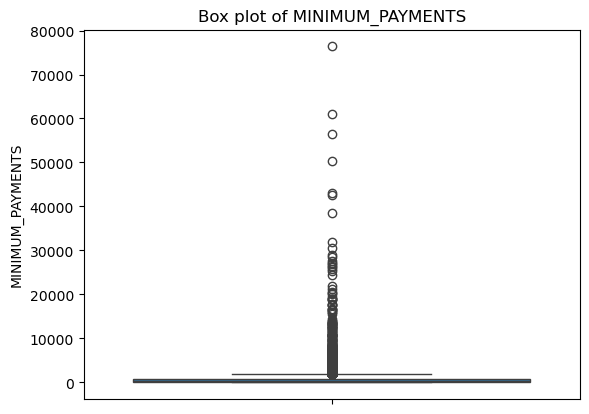

In [40]:
#Checking the distribution of 'MINIMUM_PAYMENTS'
sns.boxplot(y = "MINIMUM_PAYMENTS", data=creditcarddata)
plt.title("Box plot of MINIMUM_PAYMENTS")
plt.show()

- From the boxplot we have seen the data is skewed, so we will use median to impute the missing data

In [43]:
#Impute with median
creditcarddata['MINIMUM_PAYMENTS']=creditcarddata['MINIMUM_PAYMENTS'].fillna(creditcarddata['MINIMUM_PAYMENTS'].median())

In [45]:
#Rechecking whether imputing sucessfull or not
creditcarddata['MINIMUM_PAYMENTS'].isnull().sum()

0

**Observations**
- There are 8950 observations and 18 features
- 18 Numerical columns
- There are missing values in 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS'
- Data is skewed in CREDIT_LIMIT and MINIMUM_PAYMENTS
- We have used median to impute the missing value data

----

## Deriving New KPI

---

#### Monthly Average Purchase

In [50]:
creditcarddata["Monthly_Avg_Purchase"] = creditcarddata["PURCHASES"]/creditcarddata["TENURE"]

In [52]:
creditcarddata["Monthly_Avg_Purchase"].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_Avg_Purchase, dtype: float64

#### Monthly cash advance amount

In [55]:
creditcarddata["Monthly_Cash_Advance"] = creditcarddata["CASH_ADVANCE"]/creditcarddata["TENURE"]

### Purchase Type

In [58]:
creditcarddata.loc[:,["ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES"]].head()

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.4
1,0.00,0.0
2,773.17,0.0
3,1499.00,0.0
4,16.00,0.0


- Deriving the categorical variable based on user behaviour

In [61]:
def purchasetype(x):    
    if (x["ONEOFF_PURCHASES"] == 0) & (x["INSTALLMENTS_PURCHASES"] == 0):
        return("NONE")
    elif (x["ONEOFF_PURCHASES"] > 0) & (x["INSTALLMENTS_PURCHASES"] == 0):
        return("ONEOFF")
    elif (x["ONEOFF_PURCHASES"] == 0) & (x["INSTALLMENTS_PURCHASES"] > 0):
        return("INSTALLMENTS")
    elif (x["ONEOFF_PURCHASES"] > 0) & (x["INSTALLMENTS_PURCHASES"] > 0):
        return("BOTH_ONEOFF_INSTALLMENTS")

In [63]:
creditcarddata["Purchase_Type"] = creditcarddata.apply(purchasetype,axis=1)

In [65]:
creditcarddata["Purchase_Type"].value_counts()

Purchase_Type
BOTH_ONEOFF_INSTALLMENTS    2774
INSTALLMENTS                2260
NONE                        2042
ONEOFF                      1874
Name: count, dtype: int64

### Limit usage

- Balance to credit limit ratio

In [68]:
creditcarddata["Balance_Credit_Ratio"] = creditcarddata["BALANCE"]/creditcarddata["CREDIT_LIMIT"]

In [70]:
creditcarddata.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Purchase_Type,Balance_Credit_Ratio
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,INSTALLMENTS,0.040901
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,NONE,0.457495
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,ONEOFF,0.332687
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,ONEOFF,0.222223
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,ONEOFF,0.681429


### Payments to Minimum Payments Ratio
- Total Payment Ratio calculate it by dividing your total monthly credit payments by the total minimum due

In [73]:
#added where clause to avoid division by zero
creditcarddata["Total_Payment_Ratio"] = np.where(creditcarddata["MINIMUM_PAYMENTS"] == 0,creditcarddata["MINIMUM_PAYMENTS"], creditcarddata["PAYMENTS"]/creditcarddata["MINIMUM_PAYMENTS"])

In [75]:
creditcarddata = creditcarddata.round(2)

In [77]:
creditcarddata.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Purchase_Type,Balance_Credit_Ratio,Total_Payment_Ratio
0,C10001,40.90,0.82,95.40,0.00,95.4,0.00,0.17,0.00,0.08,...,1000.0,201.80,139.51,0.00,12,7.95,0.00,INSTALLMENTS,0.04,1.45
1,C10002,3202.47,0.91,0.00,0.00,0.0,6442.95,0.00,0.00,0.00,...,7000.0,4103.03,1072.34,0.22,12,0.00,536.91,NONE,0.46,3.83
2,C10003,2495.15,1.00,773.17,773.17,0.0,0.00,1.00,1.00,0.00,...,7500.0,622.07,627.28,0.00,12,64.43,0.00,ONEOFF,0.33,0.99
3,C10004,1666.67,0.64,1499.00,1499.00,0.0,205.79,0.08,0.08,0.00,...,7500.0,0.00,312.34,0.00,12,124.92,17.15,ONEOFF,0.22,0.00
4,C10005,817.71,1.00,16.00,16.00,0.0,0.00,0.08,0.08,0.00,...,1200.0,678.33,244.79,0.00,12,1.33,0.00,ONEOFF,0.68,2.77


---

## Insights from new KPIs

---

In [80]:
#Average Total Payment Ratio  for each purchase type
x = creditcarddata[["Purchase_Type","Total_Payment_Ratio"]].groupby(["Purchase_Type"]).agg("mean").reset_index()
x

,Purchase_Type,Total_Payment_Ratio
0,BOTH_ONEOFF_INSTALLMENTS,7.237087
1,INSTALLMENTS,13.259013
2,NONE,10.087311
3,ONEOFF,5.571051


<Axes: ylabel='Purchase_Type'>

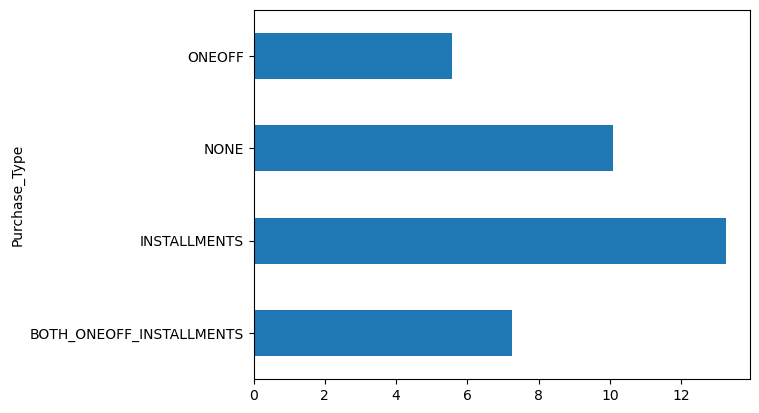

In [82]:
#checking the total payment ratio based on purchase type
# Group by 'Purchase_Type' and calculate mean of 'Total_Payment_Ratio'
mean_ratios = creditcarddata.groupby("Purchase_Type")["Total_Payment_Ratio"].mean()
mean_ratios.plot.barh()


<Axes: ylabel='Purchase_Type'>

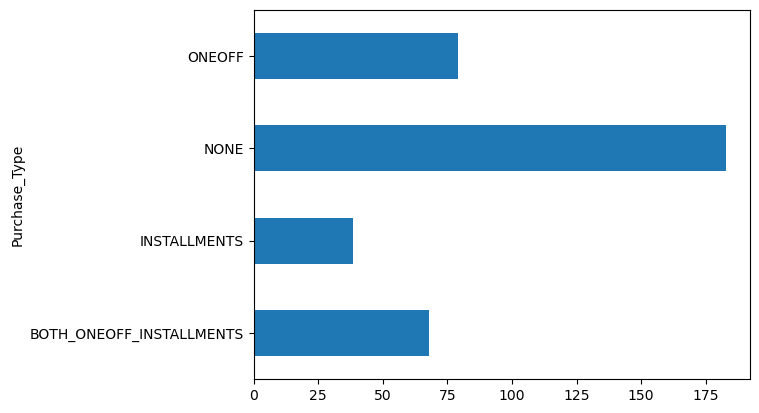

In [84]:
# Group by 'Purchase_Type' and calculate mean of 'Monthly_Cash_Advance'
mean_cash_advances = creditcarddata.groupby('Purchase_Type')['Monthly_Cash_Advance'].mean()
mean_cash_advances.plot.barh()

#### Insights
- Customers with installment payments are paying dues
- Customers who do not do ONOFF or INSTALLMENTS take more cash advance
- Customers with installment purchases have good credit score

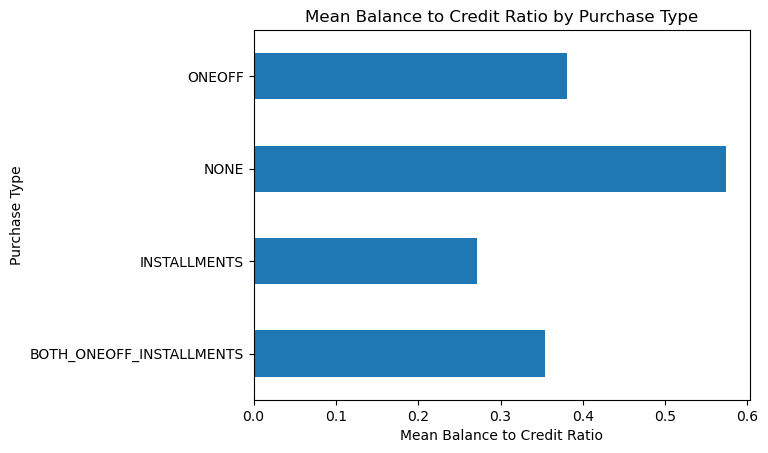

In [87]:
#balance to credit ratio (limit usage ratio) is more then the customers will have good credit score
# Group by 'Purchase_Type' and calculate mean of 'Balance_Credit_Ratio'
mean_balance_credit_ratio = creditcarddata.groupby('Purchase_Type')['Balance_Credit_Ratio'].mean()
mean_balance_credit_ratio.plot.barh()
plt.xlabel('Mean Balance to Credit Ratio')
plt.ylabel('Purchase Type')
plt.title('Mean Balance to Credit Ratio by Purchase Type')
plt.show()

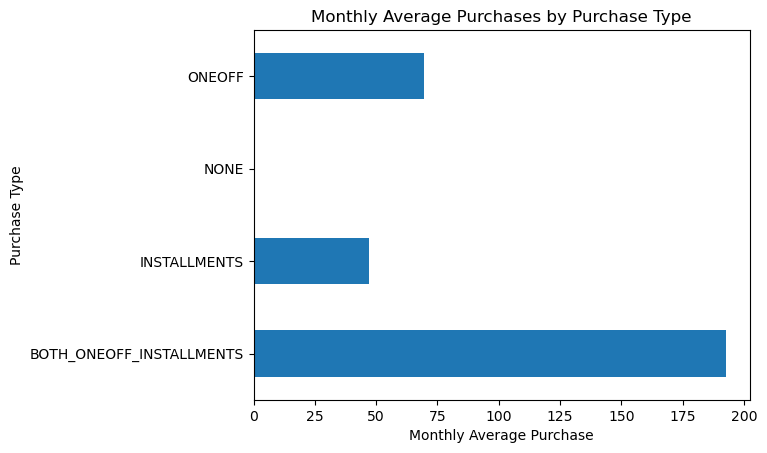

In [89]:
# #checking the monthly average purchases based on payment type
# Group by 'Purchase_Type' and calculate mean of 'Monthly_Avg_Purchase'
mean_monthly_avg_purchase = creditcarddata.groupby('Purchase_Type')['Monthly_Avg_Purchase'].mean()
mean_monthly_avg_purchase.plot.barh()
plt.xlabel('Monthly Average Purchase')
plt.ylabel('Purchase Type')
plt.title('Monthly Average Purchases by Purchase Type')
plt.show()

Customers using both oneoff and installment payment has more monthly average purchases

### Data Segregation
- Handling Categorical Variable

In [93]:
#getting the numeric variable names and data
creditcarddata_numeric = creditcarddata._get_numeric_data()

In [95]:
numeric_variable_names =  list(creditcarddata_numeric.columns)

In [97]:
numeric_variable_names

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE',
 'Monthly_Avg_Purchase',
 'Monthly_Cash_Advance',
 'Balance_Credit_Ratio',
 'Total_Payment_Ratio']

There are many variables having extreme values, i am doing the log transformation on the dataset to remove the outlier effect

In [100]:
#log transformation 
credit_log = creditcarddata_numeric.apply(lambda x: np.log(x + 1))

In [102]:
credit_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,Total_Payment_Ratio
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161638,0.619992,4.899647,3.204274,3.352403,3.319086,0.361112,0.158423,0.270125,0.113286,...,1.894731,8.094825,6.624541,5.916079,0.117550,2.519680,3.050872,2.163969,0.296065,1.357595
std,2.013303,0.148856,2.916872,3.246365,3.082973,3.566298,0.277560,0.216834,0.281965,0.156823,...,1.373856,0.819629,1.591761,1.169927,0.211692,0.130367,2.002826,2.429742,0.250341,0.940158
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.931826,0.000000,0.019803,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861981,0.636577,3.704627,0.000000,0.000000,0.000000,0.076961,0.000000,0.000000,0.000000,...,0.693147,7.378384,5.951352,5.146666,0.000000,2.564949,1.481032,0.000000,0.039221,0.647103
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.076961,0.157004,0.000000,...,2.079442,8.006701,6.754488,5.747289,0.000000,2.564949,3.494536,0.000000,0.262364,1.108563
75%,7.628098,0.693147,7.013133,6.360274,6.151961,7.016450,0.652325,0.262364,0.559616,0.198851,...,2.890372,8.779711,7.550732,6.671669,0.131028,2.564949,4.587286,4.606045,0.542324,1.953028
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,...,5.883322,10.308986,10.834124,11.243832,0.693147,2.564949,8.315721,8.276166,2.827905,8.830767


In [104]:
#categorical variable names
catergorical_variable_names = [x for x in list(creditcarddata.columns) if x not in numeric_variable_names]

In [106]:
catergorical_variable_names

['CUST_ID', 'Purchase_Type']

In [108]:
#removing the customer id as it is not significant
catergorical_variable_names.remove("CUST_ID")

- Converting to Dummy Variables #one-hotEncoding

In [111]:
dummies = pd.get_dummies(creditcarddata[catergorical_variable_names])

In [113]:
dummies.head()

,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_ONEOFF
0,False,True,False,False
1,False,False,True,False
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True


In [115]:
#concatenating both the numeric and categorical files again
pd.concat([creditcarddata,dummies],axis=1).head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Purchase_Type,Balance_Credit_Ratio,Total_Payment_Ratio,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_ONEOFF
0,C10001,40.90,0.82,95.40,0.00,95.4,0.00,0.17,0.00,0.08,...,12,7.95,0.00,INSTALLMENTS,0.04,1.45,False,True,False,False
1,C10002,3202.47,0.91,0.00,0.00,0.0,6442.95,0.00,0.00,0.00,...,12,0.00,536.91,NONE,0.46,3.83,False,False,True,False
2,C10003,2495.15,1.00,773.17,773.17,0.0,0.00,1.00,1.00,0.00,...,12,64.43,0.00,ONEOFF,0.33,0.99,False,False,False,True
3,C10004,1666.67,0.64,1499.00,1499.00,0.0,205.79,0.08,0.08,0.00,...,12,124.92,17.15,ONEOFF,0.22,0.00,False,False,False,True
4,C10005,817.71,1.00,16.00,16.00,0.0,0.00,0.08,0.08,0.00,...,12,1.33,0.00,ONEOFF,0.68,2.77,False,False,False,True


In [117]:
#keeping an orignal data copy
creditcarddata_org = pd.concat([creditcarddata,dummies],axis=1) 
creditcarddata_org.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Purchase_Type,Balance_Credit_Ratio,Total_Payment_Ratio,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_ONEOFF
0,C10001,40.90,0.82,95.40,0.00,95.4,0.00,0.17,0.00,0.08,...,12,7.95,0.00,INSTALLMENTS,0.04,1.45,False,True,False,False
1,C10002,3202.47,0.91,0.00,0.00,0.0,6442.95,0.00,0.00,0.00,...,12,0.00,536.91,NONE,0.46,3.83,False,False,True,False
2,C10003,2495.15,1.00,773.17,773.17,0.0,0.00,1.00,1.00,0.00,...,12,64.43,0.00,ONEOFF,0.33,0.99,False,False,False,True
3,C10004,1666.67,0.64,1499.00,1499.00,0.0,205.79,0.08,0.08,0.00,...,12,124.92,17.15,ONEOFF,0.22,0.00,False,False,False,True
4,C10005,817.71,1.00,16.00,16.00,0.0,0.00,0.08,0.08,0.00,...,12,1.33,0.00,ONEOFF,0.68,2.77,False,False,False,True


In [119]:
#merging the log data and dummies data
creditcarddata_merged = pd.concat([credit_log,dummies],axis = 1)
# creditcarddata_new = pd.concat([credit_log,dummies],axis = 1)

In [121]:
##dropping the variables used to create the KPI
var_names = ["BALANCE","PURCHASES","PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT","TENURE","CASH_ADVANCE","CREDIT_LIMIT"]
creditcarddata_new = creditcarddata_merged[[x for x in creditcarddata_merged.columns if x not in var_names]]

In [123]:
creditcarddata_new.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,Total_Payment_Ratio,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_ONEOFF
0,0.598837,0.000000,4.568506,0.157004,0.000000,0.076961,0.000000,0.000000,1.098612,2.191654,0.000000,0.039221,0.896088,False,True,False,False
1,0.647103,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287691,0.378436,1.574846,False,False,True,False
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180981,0.000000,0.285179,0.688135,False,False,False,True
3,0.494696,7.313220,0.000000,0.076961,0.076961,0.000000,0.076961,0.693147,0.693147,4.835647,2.898671,0.198851,0.000000,False,False,False,True
4,0.693147,2.833213,0.000000,0.076961,0.076961,0.000000,0.000000,0.000000,0.693147,0.845868,0.000000,0.518794,1.327075,False,False,False,True


In [125]:
#datatypes of new dataframe
creditcarddata_new.dtypes

BALANCE_FREQUENCY                         float64
ONEOFF_PURCHASES                          float64
INSTALLMENTS_PURCHASES                    float64
PURCHASES_FREQUENCY                       float64
ONEOFF_PURCHASES_FREQUENCY                float64
PURCHASES_INSTALLMENTS_FREQUENCY          float64
CASH_ADVANCE_FREQUENCY                    float64
CASH_ADVANCE_TRX                          float64
PURCHASES_TRX                             float64
Monthly_Avg_Purchase                      float64
Monthly_Cash_Advance                      float64
Balance_Credit_Ratio                      float64
Total_Payment_Ratio                       float64
Purchase_Type_BOTH_ONEOFF_INSTALLMENTS       bool
Purchase_Type_INSTALLMENTS                   bool
Purchase_Type_NONE                           bool
Purchase_Type_ONEOFF                         bool
dtype: object

### Check for multicollinearity

In [128]:
#correlation matrix
creditcarddata_new.corr()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,Total_Payment_Ratio,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_ONEOFF
BALANCE_FREQUENCY,1.000000,0.140011,0.110737,0.212020,0.199246,0.162496,0.194964,0.191120,0.197661,0.136655,0.153206,0.452558,-0.153108,0.191332,-0.134297,0.011392,-0.085826
ONEOFF_PURCHASES,0.140011,1.000000,0.161434,0.393549,0.812792,0.097203,-0.128254,-0.144803,0.574393,0.712305,-0.182490,-0.063056,0.236802,0.661126,-0.573717,-0.536671,0.414662
INSTALLMENTS_PURCHASES,0.110737,0.161434,1.000000,0.804250,0.191702,0.905355,-0.309380,-0.335621,0.782683,0.687568,-0.377478,-0.217464,0.185808,0.607277,0.448744,-0.591238,-0.559631
PURCHASES_FREQUENCY,0.212020,0.393549,0.804250,1.000000,0.503709,0.857019,-0.344712,-0.382300,0.921747,0.816756,-0.433223,-0.232964,0.196354,0.521632,0.309963,-0.707119,-0.194572
ONEOFF_PURCHASES_FREQUENCY,0.199246,0.812792,0.191702,0.503709,1.000000,0.143712,-0.122523,-0.145779,0.621777,0.624033,-0.178047,-0.080859,0.259715,0.555684,-0.424674,-0.397252,0.231569
PURCHASES_INSTALLMENTS_FREQUENCY,0.162496,0.097203,0.905355,0.857019,0.143712,1.000000,-0.290063,-0.315110,0.769830,0.613860,-0.354119,-0.191249,0.141595,0.486772,0.446448,-0.520620,-0.493043
CASH_ADVANCE_FREQUENCY,0.194964,-0.128254,-0.309380,-0.344712,-0.122523,-0.290063,1.000000,0.936110,-0.326467,-0.340227,0.825831,0.432835,-0.130852,-0.103763,-0.252529,0.402654,-0.027705
CASH_ADVANCE_TRX,0.191120,-0.144803,-0.335621,-0.382300,-0.145779,-0.315110,0.936110,1.000000,-0.357895,-0.378009,0.902805,0.467670,-0.146754,-0.109572,-0.279532,0.448072,-0.039111
PURCHASES_TRX,0.197661,0.574393,0.782683,0.921747,0.621777,0.769830,-0.326467,-0.357895,1.000000,0.899851,-0.414204,-0.194133,0.237142,0.620589,0.161920,-0.749516,-0.105244
Monthly_Avg_Purchase,0.136655,0.712305,0.687568,0.816756,0.624033,0.613860,-0.340227,-0.378009,0.899851,1.000000,-0.426931,-0.223222,0.290685,0.573881,0.089252,-0.828241,0.106638


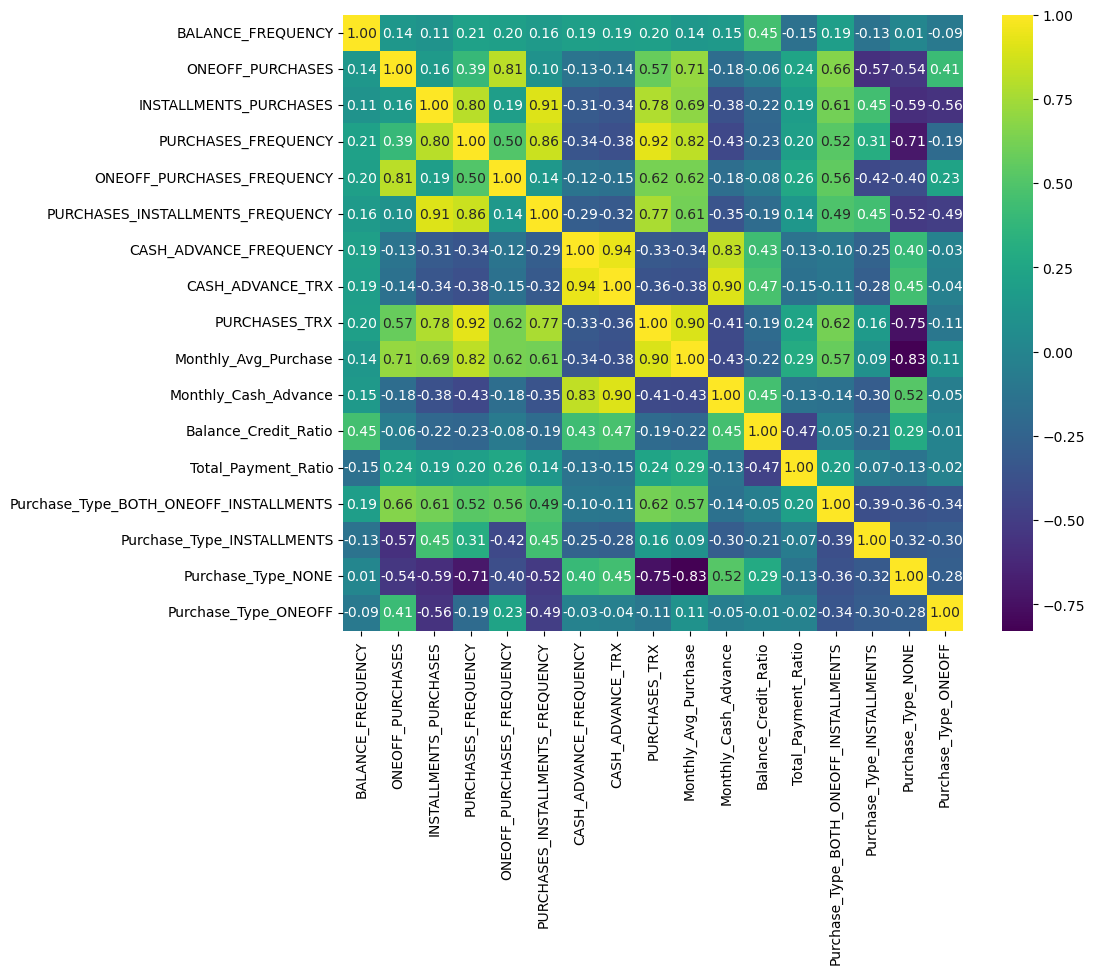

In [130]:
#creating a heatmap for better visualization
plt.figure(figsize=(10,8))
sns.heatmap(creditcarddata_new.corr(),annot=True,fmt=".2f",cmap="viridis")
plt.show()

<big>
- Heat map shows that many features are co-related so applying dimension reduction will help negating multi-colinearity in data.
</big>

- Before applying the PCA we will standardize data to avoid effect of scale on the result. Scaling will make all features with equal weight.

### Standardization of data

In [134]:
from sklearn.preprocessing import StandardScaler

In [136]:
#Create an object
sc = StandardScaler()

In [138]:
creditcard_scaled = sc.fit_transform(creditcarddata_new)

In [140]:
pd.DataFrame(creditcard_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,8.950000e+03,8950.000000,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,4.382342e-16,0.000000,1.034058e-16,-9.526830e-18,1.714829e-16,-1.143220e-16,6.986342e-17,-5.795488e-17,1.397268e-16,-4.922195e-17,-4.842805e-17,-6.033659e-17,1.262305e-16,4.445854e-17,-6.986342e-17,5.160366e-17,-9.526830e-17
std,1.000056e+00,1.000056,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-4.165266e+00,-0.987090,-1.087454e+00,-1.301095e+00,-7.306590e-01,-9.580617e-01,-7.224223e-01,-8.100687e-01,-1.379210e+00,-1.523368e+00,-8.906669e-01,-1.182714e+00,-1.444087e+00,-6.701925e-01,-5.812208e-01,-5.436904e-01,-5.146250e-01
25%,1.114241e-01,-0.987090,-1.087454e+00,-1.023803e+00,-7.306590e-01,-9.580617e-01,-7.224223e-01,-8.100687e-01,-8.746552e-01,-7.838563e-01,-8.906669e-01,-1.026036e+00,-7.557570e-01,-6.701925e-01,-5.812208e-01,-5.436904e-01,-5.146250e-01
50%,4.914786e-01,0.141485,3.721960e-01,1.598063e-01,-3.757081e-01,-4.012107e-01,-7.224223e-01,-8.100687e-01,1.344545e-01,2.215312e-01,-8.906669e-01,-1.346266e-01,-2.648979e-01,-6.701925e-01,-5.812208e-01,-5.436904e-01,-5.146250e-01
75%,4.914786e-01,0.972218,9.081215e-01,1.049250e+00,4.793874e-01,1.026748e+00,5.456405e-01,7.846025e-01,7.247459e-01,7.671657e-01,1.005132e+00,9.837522e-01,6.333683e-01,1.492109e+00,1.720516e+00,-5.436904e-01,-5.146250e-01
max,4.914786e-01,2.283062,2.163264e+00,1.196332e+00,2.466195e+00,1.500349e+00,5.120722e+00,3.965987e+00,2.903371e+00,2.628856e+00,2.515715e+00,1.011415e+01,7.949291e+00,1.492109e+00,1.720516e+00,1.839282e+00,1.943162e+00


### PCA

In [143]:
from sklearn.decomposition import PCA

In [145]:
#applying the PCA to find the number of factors
variance_ratio = {}
for n in range(2,18):
    pc = PCA(n_components=n)
    cr_pca = pc.fit(creditcard_scaled)
    variance_ratio[n] = sum(cr_pca.explained_variance_ratio_)


In [147]:
#ratio of variance explained 
variance_ratio

{2: 0.5824607599200586,
 3: 0.7297466434636787,
 4: 0.8113282252273142,
 5: 0.8768561357190724,
 6: 0.9184810955062312,
 7: 0.9409751162847564,
 8: 0.9615534006293787,
 9: 0.9739448843439256,
 10: 0.9835980480783899,
 11: 0.9897248725782216,
 12: 0.9927531994176726,
 13: 0.9953959123246182,
 14: 0.9979644752646768,
 15: 0.9996366026820455,
 16: 1.0000000000000002,
 17: 1.0000000000000002}

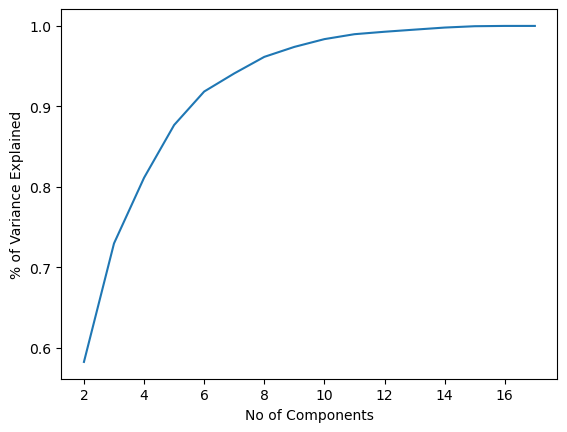

In [149]:
#plotting the graph
pd.Series(variance_ratio).plot()
plt.xlabel("No of Components")
plt.ylabel("% of Variance Explained")
plt.show()

<big>
- Since 5 Components are explaining about 88% of the variance we select 5 components
</big>

In [152]:
final_pc = PCA(n_components=5).fit(creditcard_scaled)
reduced_creditdata = final_pc.fit_transform(creditcard_scaled)

In [154]:
#main data set has 17 components
creditcard_scaled.shape

(8950, 17)

In [156]:
#after doing pca we got 5 components
reduced_creditdata.shape

(8950, 5)

In [158]:
column_names = creditcarddata_new.columns
column_names

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_Avg_Purchase',
       'Monthly_Cash_Advance', 'Balance_Credit_Ratio', 'Total_Payment_Ratio',
       'Purchase_Type_BOTH_ONEOFF_INSTALLMENTS', 'Purchase_Type_INSTALLMENTS',
       'Purchase_Type_NONE', 'Purchase_Type_ONEOFF'],
      dtype='object')

- Visualizing the reduced factors

In [161]:
pd.DataFrame(final_pc.components_.T,columns=['PC_' + str(i) for i in range(5)],index=column_names)

,PC_0,PC_1,PC_2,PC_3,PC_4
BALANCE_FREQUENCY,0.029847,0.240297,-0.262754,-0.353524,-0.228764
ONEOFF_PURCHASES,0.214081,0.405781,0.240049,0.001340,-0.023165
INSTALLMENTS_PURCHASES,0.312163,-0.098002,-0.315571,0.087945,-0.002057
PURCHASES_FREQUENCY,0.345816,0.016014,-0.163088,-0.074366,0.115332
ONEOFF_PURCHASES_FREQUENCY,0.214669,0.361716,0.163291,0.036587,-0.051420
PURCHASES_INSTALLMENTS_FREQUENCY,0.295541,-0.111518,-0.330038,0.023473,0.025880
CASH_ADVANCE_FREQUENCY,-0.213932,0.286571,-0.278261,0.096093,0.360749
CASH_ADVANCE_TRX,-0.229368,0.292065,-0.284771,0.103467,0.332620
PURCHASES_TRX,0.355594,0.106799,-0.102334,-0.054427,0.104945
Monthly_Avg_Purchase,0.346031,0.141640,0.024457,-0.079612,0.194129


In [163]:
pd.DataFrame(final_pc.explained_variance_ratio_,columns=["Variance Ratio"],index=["PC_" + str(i) for i in range(5)])

,Variance Ratio
PC_0,0.401937
PC_1,0.180524
PC_2,0.147286
PC_3,0.081582
PC_4,0.065528


### Clustering
- Find the optimum number of clusters using Silhoutte Coefficient

In [166]:
from sklearn import metrics
from sklearn.cluster import KMeans

In [168]:
scores = []
inertia = []
k_range = range(3, 12)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(creditcard_scaled)
    scores.append(metrics.silhouette_score(creditcard_scaled, km.labels_))
    inertia.append(km.inertia_)

In [169]:
scores

[0.31677629527868123,
 0.3883321935622073,
 0.35132935728236636,
 0.3512468306061568,
 0.3447917172088093,
 0.31867268374886104,
 0.3192021898280947,
 0.31453527980230495,
 0.3266641079573144]

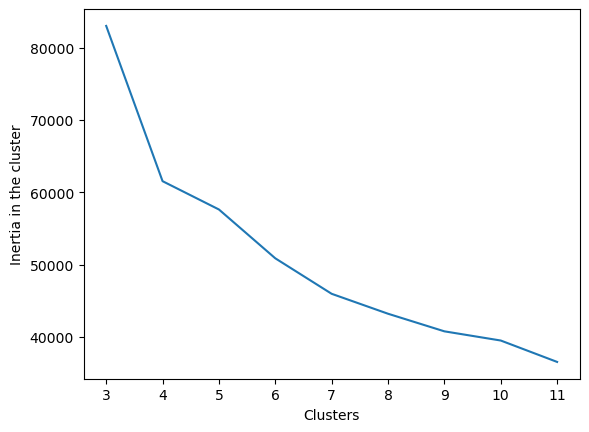

In [172]:
plt.plot(k_range,inertia)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

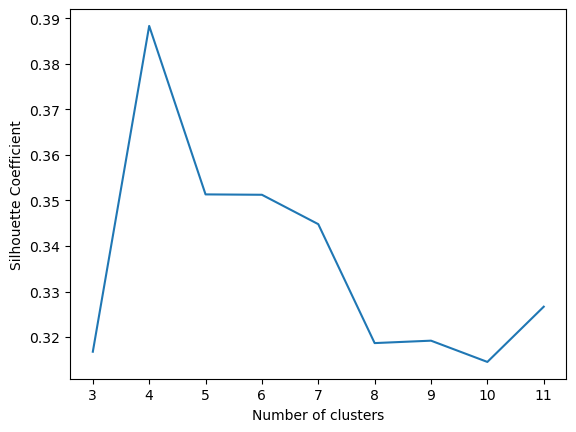

In [174]:
#plotting the sc scores
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### Insights
- From SC Score, the number of optimal clusters are 4

### 4-Cluster Solution

In [178]:
km_4 = KMeans(n_clusters=4,random_state=123)

In [180]:
# km_4 = KMeans(n_clusters=4,random_state=123)
#fitting the Kmeans 
km_4.fit(reduced_creditdata)
km_4.labels_

array([0, 1, 3, ..., 0, 1, 3], dtype=int32)

In [182]:
#proportion of labels classified
pd.Series(km_4.labels_).value_counts()

2    2758
0    2229
1    2089
3    1874
Name: count, dtype: int64

<big>
Plotting the 4 cluster Solution labels    
</big>

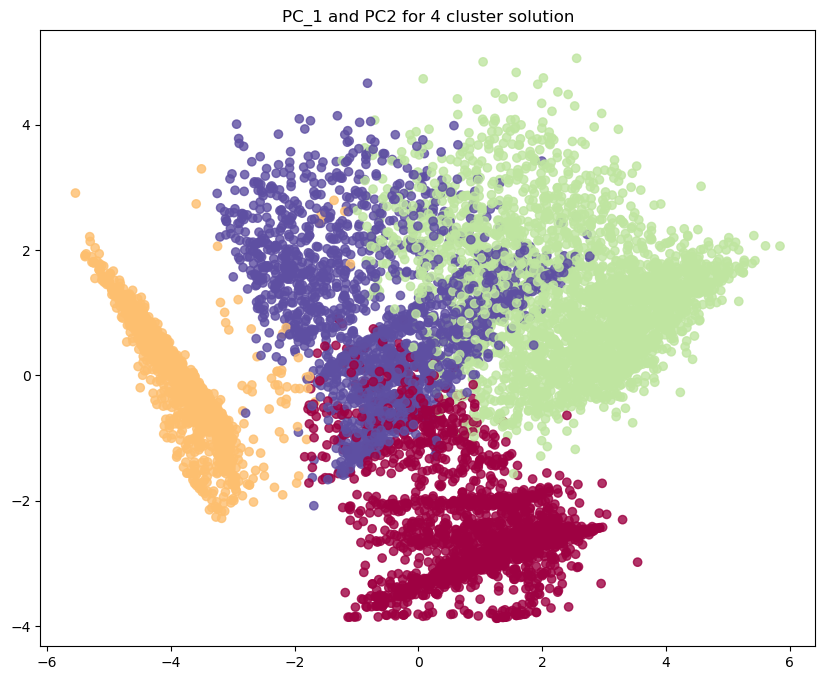

In [185]:
plt.figure(figsize=(10, 8 ))
plt.scatter(reduced_creditdata[:, 0], reduced_creditdata[:, 1], c = km_4.labels_, cmap = "Spectral", alpha = 0.8)
plt.title("PC_1 and PC2 for 4 cluster solution")
plt.show()

<big> 
    Taking the key performance index variables for analysis
</big>

In [188]:
col_key_kpi = ["PURCHASES_TRX","Monthly_Avg_Purchase","Monthly_Cash_Advance","Balance_Credit_Ratio","CASH_ADVANCE_TRX","Total_Payment_Ratio","Purchase_Type_INSTALLMENTS","Purchase_Type_NONE","Purchase_Type_BOTH_ONEOFF_INSTALLMENTS","Purchase_Type_ONEOFF","CREDIT_LIMIT"]

In [190]:
#making a dataframe with 4 cluster solution labels
cluster_df_4 = pd.concat([creditcarddata_org[col_key_kpi], pd.Series(km_4.labels_,name="Cluster_4")], axis =1)

In [192]:
cluster_df_4.head()

,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,CASH_ADVANCE_TRX,Total_Payment_Ratio,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_ONEOFF,CREDIT_LIMIT,Cluster_4
0,2,7.95,0.00,0.04,0,1.45,True,False,False,False,1000.0,0
1,0,0.00,536.91,0.46,4,3.83,False,True,False,False,7000.0,1
2,12,64.43,0.00,0.33,0,0.99,False,False,False,True,7500.0,3
3,1,124.92,17.15,0.22,1,0.00,False,False,False,True,7500.0,3
4,1,1.33,0.00,0.68,0,2.77,False,False,False,True,1200.0,3


#### Grouping the data based on cluster.

#### Mean gives a good indication of the distribution of data. so we are finding the mean for each variable for each cluster 


In [195]:
mean_values = cluster_df_4.groupby('Cluster_4')[col_key_kpi].mean()
#Transposing
cluster_4 = mean_values.T
cluster_4


Cluster_4,0,1,2,3
PURCHASES_TRX,12.049349,0.044998,33.125453,7.118997
Monthly_Avg_Purchase,47.553876,0.157688,193.696041,69.758170
Monthly_Cash_Advance,33.481377,186.380235,67.620018,77.843474
Balance_Credit_Ratio,0.264459,0.576103,0.354572,0.378629
CASH_ADVANCE_TRX,1.020637,6.553854,2.807107,2.864995
Total_Payment_Ratio,13.397622,9.931565,7.268709,5.561393
Purchase_Type_INSTALLMENTS,0.998205,0.016754,0.000000,0.000000
Purchase_Type_NONE,0.000000,0.977501,0.000000,0.000000
Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,0.001795,0.002393,1.000000,0.003735
Purchase_Type_ONEOFF,0.000000,0.003351,0.000000,0.996265


In [197]:
def ClusterPercentage(datafr,name):
    """Common utility function to calculate the percentage and size of cluster"""
    
    size = pd.Series(datafr[name].value_counts().sort_index())
    percent = pd.Series(round(datafr[name].value_counts()/datafr.shape[0] * 100,2)).sort_index()

    size_df = pd.concat([size, percent],axis=1)
    size_df.columns = ["Cluster_Size","Cluster_Percentage"]
    
    return(size_df)

In [199]:
ClusterPercentage(cluster_df_4,"Cluster_4")

,Cluster_Size,Cluster_Percentage
Cluster_4,,
0,2229,24.91
1,2089,23.34
2,2758,30.82
3,1874,20.94


In [201]:
#transposing the cluster
cluster_4_T = cluster_4.T

In [203]:
cluster_4_T

,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,CASH_ADVANCE_TRX,Total_Payment_Ratio,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_ONEOFF,CREDIT_LIMIT
Cluster_4,,,,,,,,,,,
0,12.049349,47.553876,33.481377,0.264459,1.020637,13.397622,0.998205,0.000000,0.001795,0.000000,3334.739067
1,0.044998,0.157688,186.380235,0.576103,6.553854,9.931565,0.016754,0.977501,0.002393,0.003351,4056.949100
2,33.125453,193.696041,67.620018,0.354572,2.807107,7.268709,0.000000,0.000000,1.000000,0.000000,5750.015566
3,7.118997,69.758170,77.843474,0.378629,2.864995,5.561393,0.000000,0.000000,0.003735,0.996265,4512.905630


In [205]:
def ClusterAnalysis(datafr):
    """A function to analyze the KPI variables across each segment in the cluster and returns dataframe useful for plotting"""
    
    #Build a dataframe of KPI for each cluster suitable for plotting
    n = datafr.shape[0]
    
    mn_cash_advnce = pd.Series(np.log(datafr.reset_index(drop = True)["Monthly_Cash_Advance"]))
    balance_crdt_ratio = pd.Series(datafr.reset_index(drop = True)["Balance_Credit_Ratio"])
    mn_avg_purchases = pd.Series(np.log(datafr.reset_index(drop = True)["Monthly_Avg_Purchase"]))
    total_pymnt_ratio = pd.Series(datafr.reset_index(drop = True)["Total_Payment_Ratio"])
    installment = pd.Series(datafr.reset_index(drop = True)["Purchase_Type_INSTALLMENTS"])
    oneoff = pd.Series(datafr.reset_index(drop = True)["Purchase_Type_ONEOFF"])

    final_df = pd.concat([mn_cash_advnce,mn_avg_purchases,balance_crdt_ratio,total_pymnt_ratio,installment,oneoff],axis=1)
    final_df.columns=["Monthly_Cash_Advance","Monthly_Avg_Purchase","Balance_Credit_Ratio","Total_Payment_Ratio","Installments","Oneoff"]
    final_df.index = ["Cl-"+ str(i) for i in range(n)]
    return(final_df)
    

In [207]:
final_df_4 = ClusterAnalysis(cluster_4_T)
final_df_4

,Monthly_Cash_Advance,Monthly_Avg_Purchase,Balance_Credit_Ratio,Total_Payment_Ratio,Installments,Oneoff
Cl-0,3.510989,3.861863,0.264459,13.397622,0.998205,0.000000
Cl-1,5.227789,-1.847138,0.576103,9.931565,0.016754,0.003351
Cl-2,4.213904,5.266290,0.354572,7.268709,0.000000,0.000000
Cl-3,4.354700,4.245035,0.378629,5.561393,0.000000,0.996265


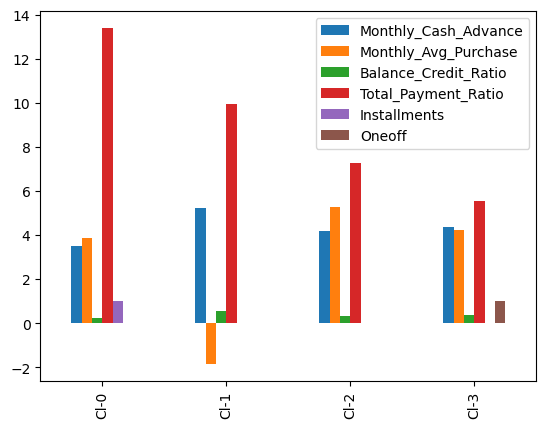

In [209]:
final_df_4.plot(kind = "bar")
#plt.xticks(["11","22","33","44"])
plt.show()

### Insights with 4 Clusters


----
- Cluster 0 customers have lowest balance to credit ratio (good credit score) and are paying dues also doing maximum installment purchases. **This group is about 25% of the total customer base**
----
- Cluster 1 customers are taking maximum advance cash and has high debt to credit ratio (poor credit rating) & not doing any purchase transcation.**This group is about 23% of the total customer base**
----
- Cluster 2 is the group of customers who have the highest Monthly Average Purchases and are not doing installment or one off purchases and are only taking cash advances. **This group is about 31% of the total customer base**
----
- Cluster 3 customers are doing  maximum one off payments and least total payment ratio. **This group is about 21% of the total customer base**
----

In [215]:

#adding cluster labels to the orignal dataset
cluster_labels = km_4.labels_
creditcarddata['Clusters']=cluster_labels

#updated creditcarddata dataset with cluster labels to an excel file and putting it into a new excel file
output_file_path = './Data/Credit_Card_New.xlsx' 
creditcarddata.to_excel(output_file_path)